<a href="https://www.kaggle.com/code/jacobleksan/jacob-s-nueral-network-numbers?scriptVersionId=154109042" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


# First, we will import our data from kraggle and see how it is formed and shaped:

In [2]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [4]:
data.shape

(42000, 785)

In [5]:
# Convert data to a usable format and shuffle it to help improve results
data = data.to_numpy()
np.random.shuffle(data)

We will then split up the data into two seperate groups: training and testing. This is meant to prevent overfitting to the training data so that we can get a better sense of its accuracy by using it on the testing data. The .T element at the end is a transposition function to change the dimensions of the data so that it can be more easily manipulated.

In [6]:
m,n = data.shape

# Get the first 1000 examples to be used for training
data_train = data[0:1000].T
y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255

# The rest will be available for testing
data_test = data[1000:m].T
y_test = data_test[0]
X_test = data_test[1:n]
X_test = (X_test / 255)

Next, we will construct our neural network, comprising three layers: the input layer, one hidden layer, and the output layer. The input data will be sourced from Kaggle, processed through the forward propagation equations:

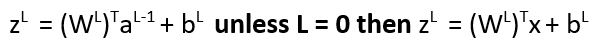

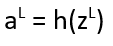

Our initial weights and biases will be randomly generated. The result will undergo activation (h) by the ReLU function to yield inputs for the hidden layer.

Subsequently, the hidden layer information will follow the same equation, activated (h) by the softmax function to compute values for the output layer. These values aim to represent the probability of a digit falling within the range of 0-9.

In [7]:
def init_param(n):
    # We want a value between -0.5 and 0.5
    W1 = np.random.rand(n, 10) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1,b1,W2,b2

def ReLU(x):
    return np.maximum(x,0)

def softmax(x):
    exp = np.exp(x - np.max(x))
    return exp / exp.sum(axis=0)

def forward_prop(W1,b1,W2,b2,X):
    # Linear transformation and activation for the first layer
    Z1 = np.dot(W1.T, X) + b1
    A1 = ReLU(Z1)
    # Linear transformation and activation for the second layer
    Z2 = np.dot(W2.T,A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

To assess the model's performance, we will compare these values with the actual recorded values. Subsequently, we will employ the backpropagation technique to refine the values, steering them closer to our goal of accurately determining the correct digit. This adjustment process involves a series of equations designed to optimize the network's performance. 

The initial equation serves to calculate the error (∂), determining the extent of adjustments needed for both weights and biases:

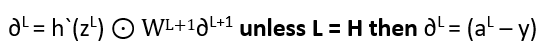

Subsequently, the second equation leverages the calculated error (∂) and the activation or input values to establish the magnitude of weight adjustments based on the observed error:

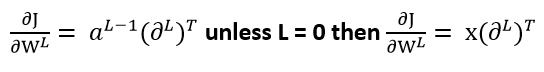

Lastly, the third equation utilizes the error (δδ) to determine the extent of bias adjustments based on the observed error:

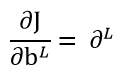

These equations collectively guide the iterative process of refining weights and biases in response to the identified errors.

In [8]:
def oneHot(y,number_classes):
    # Create a matrix of 0's
    Hot = np.zeros((number_classes,y.size))
    # Set the index of the correct answer to 1
    Hot[y,np.arange(y.size)] = 1
    return Hot

def RELU_gradient(x):
    return x > 0
  
def backward_prop(W1,b1,W2,b2,Z1,A1,Z2,A2,X,y,m):
    # Convert labels to one-hot encoding
    y_hot = oneHot(y,10)
    
    # Compute the error in the output layer
    d2 = A2 - y_hot
    # Calculate gradients for weights and bias in the output layer
    dW2 = 1/m * np.dot(A1,d2.T)
    db2 = 1/m * np.sum(d2, axis=1, keepdims=True)
    
    # Backpropagate the error to the hidden layer using the weights of the output layer and the gradient of the ReLU activation function
    d1 = np.dot(W2,d2) * RELU_gradient(Z1)
    # Calculate gradients for weights and bias in the hidden layer
    dW1 = 1/m * np.dot(X,d1.T)
    db1 = 1/m * np.sum(d1, axis=1, keepdims=True)
    
    # Return the computed gradients
    return dW1, dW2, db1, db2

# Next, we put it all together:

To update params, we will use these equations, where lr is the predetermined learning rate:

W = W - lr * dW

b = b - lr * db

In [9]:
def update_params(lr, W1, b1, W2, b2, dW1, db1, dW2, db2):
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2
    return W1,b1,W2,b2

def get_accuracy(prediction, Y):
    return np.sum(prediction == Y)/ Y.size
    
def get_prediction(A2):
    return np.argmax(A2,0)

def gradient_desent(num_epochs,lr,n,m,X,y):

    # First we create a random set of weights and biases that match the shape of the X data being inputted
    W1,b1,W2,b2 = init_param(n)

    # epoch refers to the number of iterations of training on the data 
    for epoch in range(num_epochs):
        #Data is sent through the network to see what the result is
        Z1,A1,Z2,A2 = forward_prop(W1,b1,W2,b2,X)
        
        # The values are used to determine how much the weights and biases should change to get closer to our desired result
        dW1,dW2,db1,db2 = backward_prop(W1,b1,W2,b2,Z1,A1,Z2,A2,X,y,m)
    
        # The weights and biases are updated using the calculated values from backpropogation and an adjustable learning rate
        W1,b1,W2,b2 = update_params(lr, W1, b1, W2, b2, dW1, db1, dW2, db2)
        
        if (epoch % 100 == 0):
            print("Iteration: ", epoch)
            print("Accuracy: ", get_accuracy(get_prediction(A2),y))
            print("\n")
        
    return W1, b1, W2, b2

# Now we put all the functions to use to actually train the model. The returned weights and biases should be the trained results:

In [10]:
n,m = X_train.shape
num_epochs = 1000
lr = 0.1

W1, b1, W2, b2 = gradient_desent(num_epochs,lr,n,m,X_train,y_train)

Iteration:  0
Accuracy:  0.094


Iteration:  100
Accuracy:  0.637


Iteration:  200
Accuracy:  0.807


Iteration:  300
Accuracy:  0.861


Iteration:  400
Accuracy:  0.896


Iteration:  500
Accuracy:  0.92


Iteration:  600
Accuracy:  0.932


Iteration:  700
Accuracy:  0.946


Iteration:  800
Accuracy:  0.951


Iteration:  900
Accuracy:  0.967




# Next, we will define functions to assess the performance of our model on the testing data, utilizing the weights and biases calculated during the gradient descent training:

In [11]:
def make_predictions(X,W1,b1,W2,b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_prediction(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_test[:, index, None]
    prediction = make_predictions(X_test[:, index, None], W1, b1, W2, b2)
    label = y_test[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
    

# Testing Time:

Prediction:  [1]
Label:  1


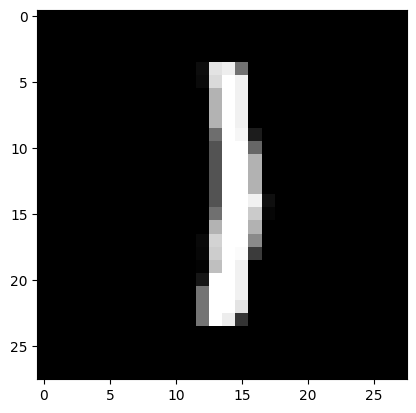

Prediction:  [1]
Label:  1


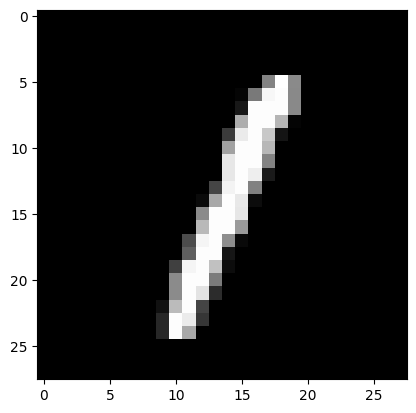

Prediction:  [4]
Label:  4


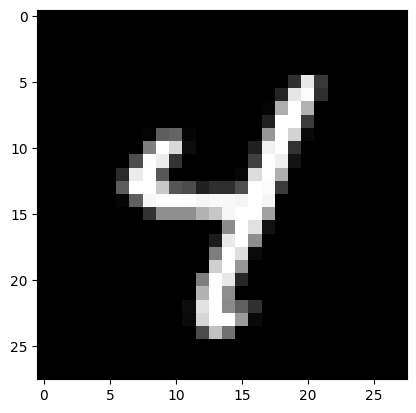

Prediction:  [0]
Label:  0


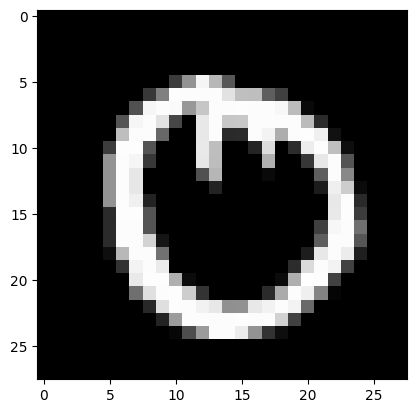

In [12]:
test_prediction(45, W1, b1, W2, b2)
test_prediction(62, W1, b1, W2, b2)
test_prediction(89, W1, b1, W2, b2)
test_prediction(91, W1, b1, W2, b2)

In [13]:
dev_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(dev_predictions, y_test)

0.8293170731707317

# So an accuracy of around 80% on our testing data, which is not too bad!